# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data_path = 'drive/MyDrive/Data_analitic/Python/Pandas_Python/yulu_rental.csv'
df = pd.read_csv(data_path)

In [ ]:
# Завантаження даних
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [ ]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

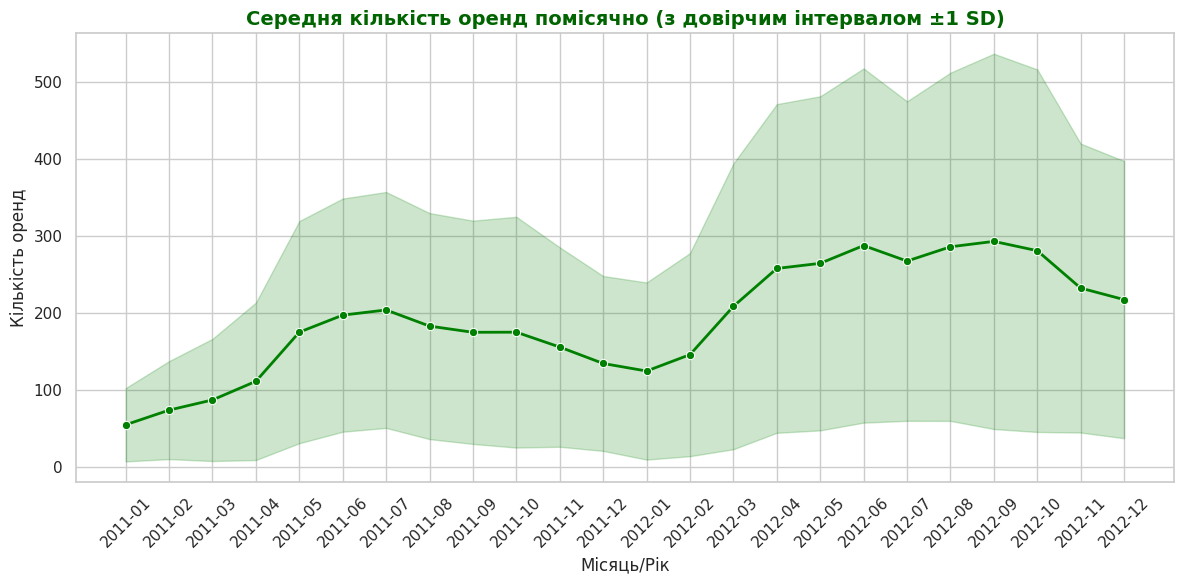

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='count', data=df, errorbar='sd', marker='o', linewidth=2, color='green')

# Оформлення
plt.title('Середня кількість оренд помісячно (з довірчим інтервалом ±1 SD)', color='darkgreen', fontsize=14, fontweight='bold')
plt.xlabel('Місяць/Рік')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Відповідь
Найбільший розкид даних спостерігається у період 2012-08 – 2012-09. Це може бути пов’язано зі змінами погоди, зокрема з коливанням температури протягом дня. Осінь – це період переходу від літа до холоднішої пори, що призводить до більшої мінливості в орендах.

In [ ]:
df_grouped = df.groupby(['year', 'month'])['count'].agg(['min', 'mean', 'max'])
print(df_grouped.loc[(2011, 7)])
print(df_grouped.loc[(2012, 8)])

min       1.000000
mean    203.614035
max     596.000000
Name: (2011, 7), dtype: float64
min       3.000000
mean    285.570175
max     897.000000
Name: (2012, 8), dtype: float64


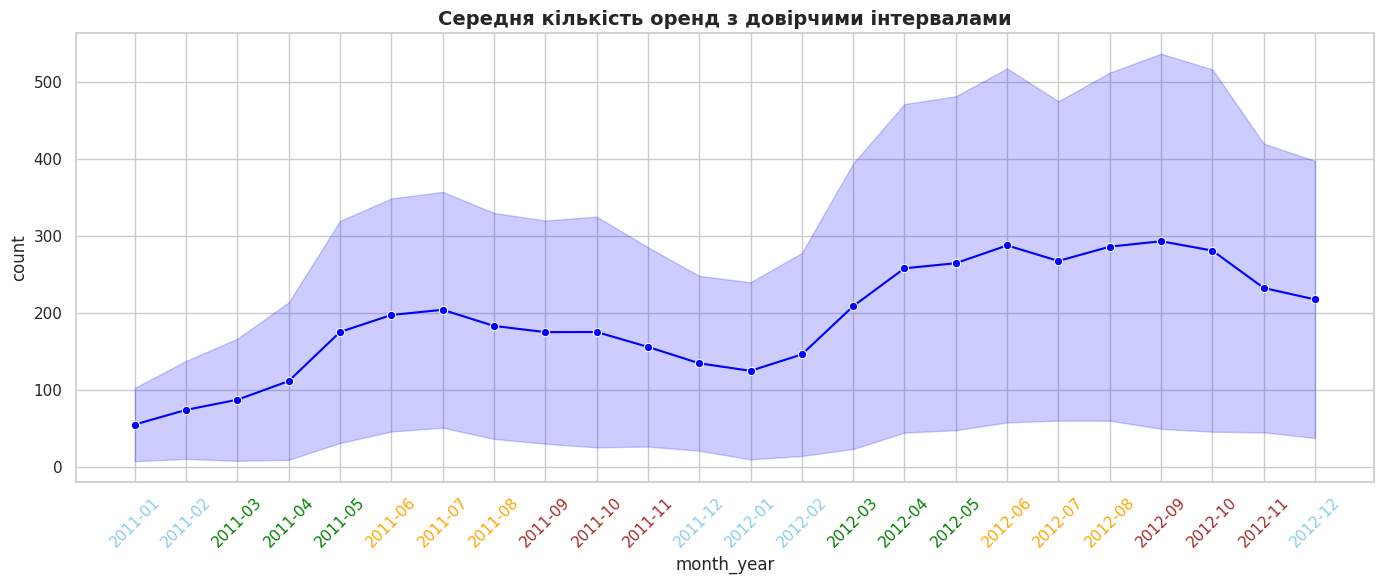

In [ ]:
# Побудова графіка
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df, x='month_year', y='count', marker='o', errorbar='sd', color='blue')

# Змусити matplotlib відмалювати графік, щоб з'явилися підписи осі X
plt.xticks(rotation=45)
plt.draw()  # <- ОБОВ’ЯЗКОВО перед доступом до get_xticklabels()

# Задаємо кольори по сезонах (місяць у форматі YYYY-MM)
month_labels = df['month_year'].unique()

for label, month in zip(ax.get_xticklabels(), month_labels):
    m = int(month.split('-')[1])  # отримуємо номер місяця
    if m in [12, 1, 2]:
        label.set_color('skyblue')  # зима
    elif m in [3, 4, 5]:
        label.set_color('green')  # весна
    elif m in [6, 7, 8]:
        label.set_color('orange')  # літо
    else:
        label.set_color('brown')  # осінь

plt.title('Середня кількість оренд з довірчими інтервалами', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

In [ ]:
temp = df['temp']

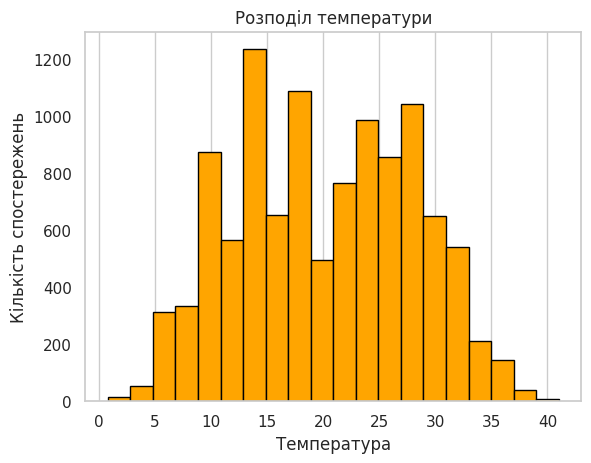

In [ ]:
plt.hist(temp, bins=20, color='orange', edgecolor='black')
plt.title('Розподіл температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

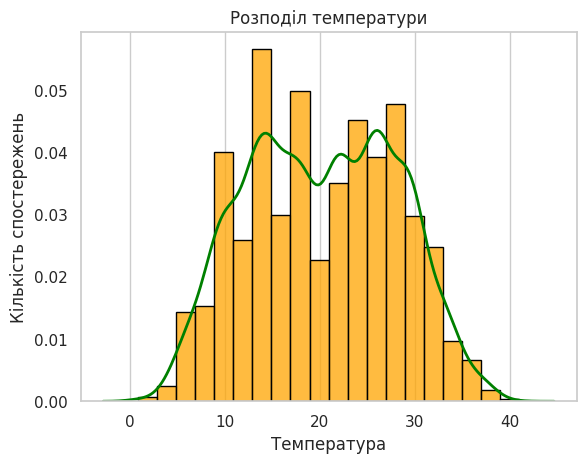

In [ ]:
sns.histplot(temp, bins=20, color='orange', edgecolor='black', stat='density')
sns.kdeplot(temp, color='green', linewidth=2)
plt.title('Розподіл температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

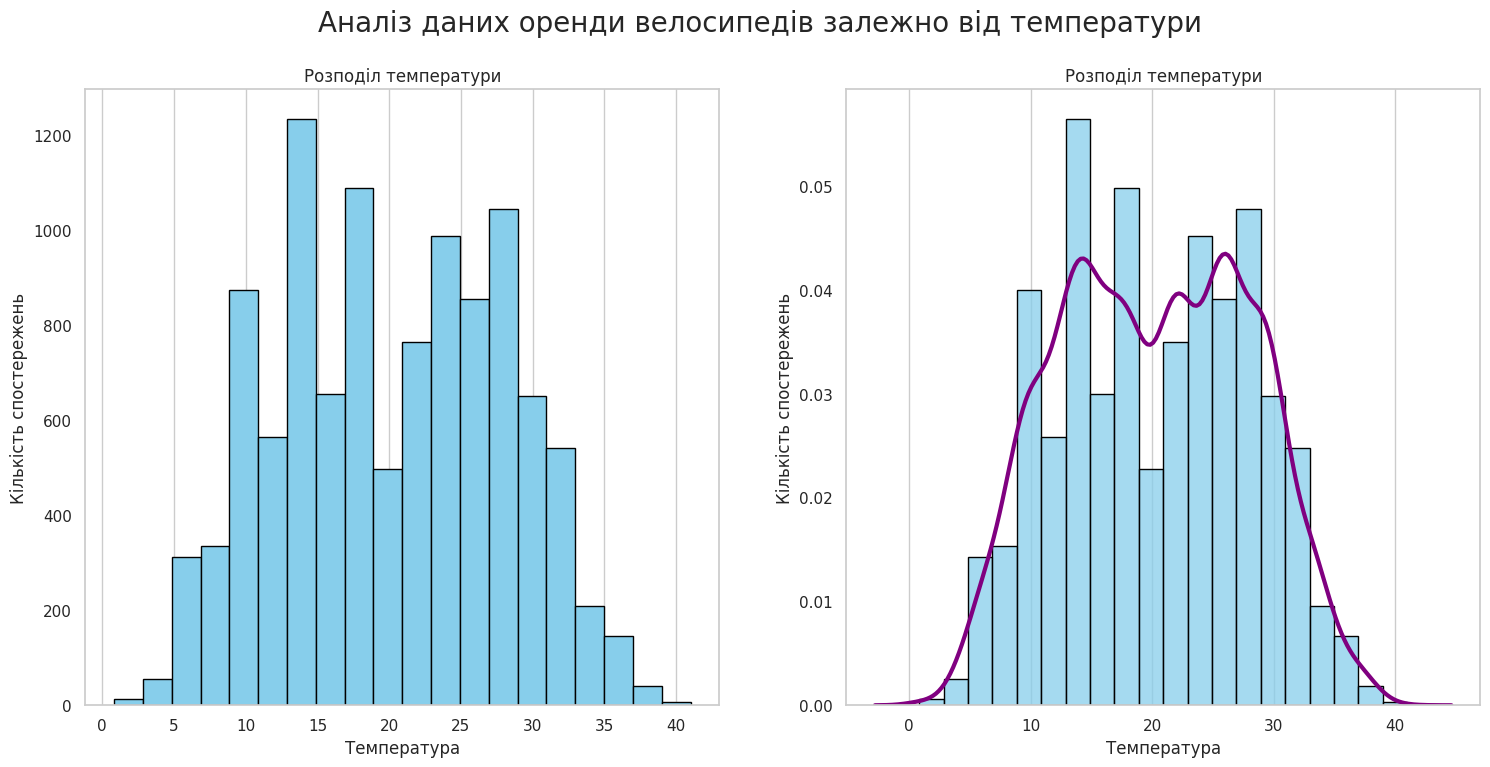

In [ ]:
plt.figure(figsize=(18, 8))
plt.suptitle('Аналіз даних оренди велосипедів залежно від температури', fontsize=20)

plt.subplot(1, 2, 1)
plt.hist(temp, bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')


plt.subplot(1,2,2)
sns.histplot(temp, bins=20, color='skyblue', edgecolor='black', stat='density')
sns.kdeplot(temp, color='purple', linewidth=3)
plt.title('Розподіл температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

Дайте відповідь на питання:

Яка візуальна різниця між Pandas та Seaborn гістограмами?
- візуально кольори в seaborn більш блідніші/м'якші, додана лінія на гістграмі; виглдаяє більш інформативно за рахунок лінії.

Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?
- ця лінія (kde) показує розподіл даних, вона як альтернатива ціє ж гістогрмаи. На графіку видно два піки та спадння в середині гістограми (схожий розподіл на дзвінок з двома піками, двогорбий розподіл даних). Ця лінія допомагає побачити розподіл значень, чи є асиметрія, як розподіляються дані. За рахунок того, що ця лінія плавна, візуально зручно побачити розподіл даних і визначити пік(и) і зрозуміти розподіл даних.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

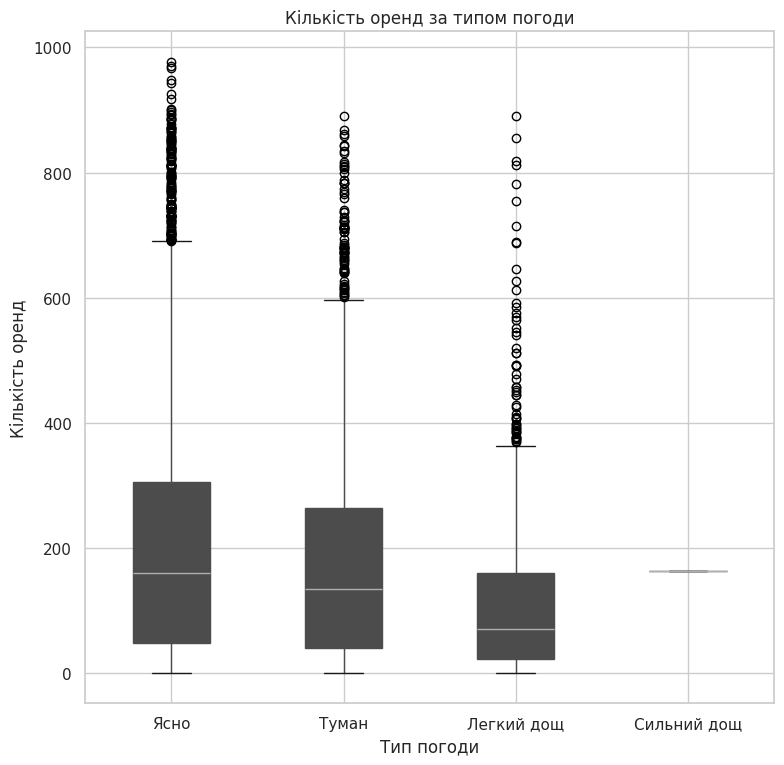

In [ ]:
df.boxplot(
    column='count',
    by='weather',
    #vert=False,
    figsize=(8, 8),
    grid=True,
    patch_artist=True
)

plt.title('Кількість оренд за типом погоди')
plt.suptitle('')
plt.xlabel('Тип погоди')
plt.ylabel('Кількість оренд')
plt.xticks(
    ticks=[1, 2, 3, 4],
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)

plt.tight_layout()
plt.show()

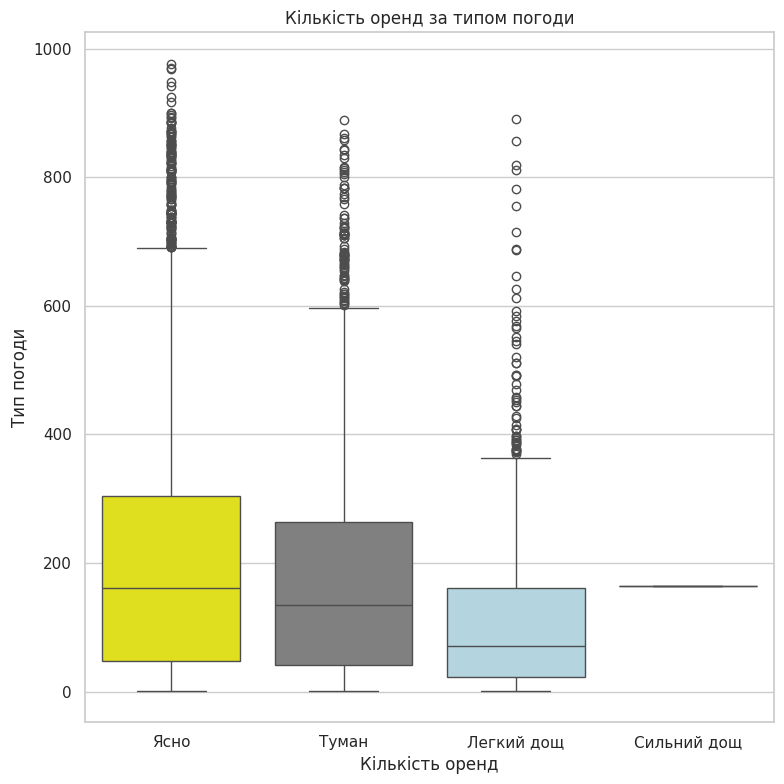

In [ ]:
plt.figure(figsize=(8, 8))

# Визначаємо кольори для кожного типу погоди вручну
palette = {
    1: 'yellow',
    2: 'grey',
    3: 'lightblue',
    4: 'blue'
}

sns.boxplot(
    data=df,
    x='weather',      # ← Тепер по осі X — категорія
    y='count',        # ← А по Y — значення
    hue='weather',
    palette=palette,
    legend=False      # Вимикаємо легенду, бо вона нам не потрібна
)

plt.title('Кількість оренд за типом погоди')
plt.xlabel('Кількість оренд')
plt.ylabel('Тип погоди')

# Якщо значення weather — це числа (1–4), підписи можна налаштувати:
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)

plt.tight_layout()
plt.show()

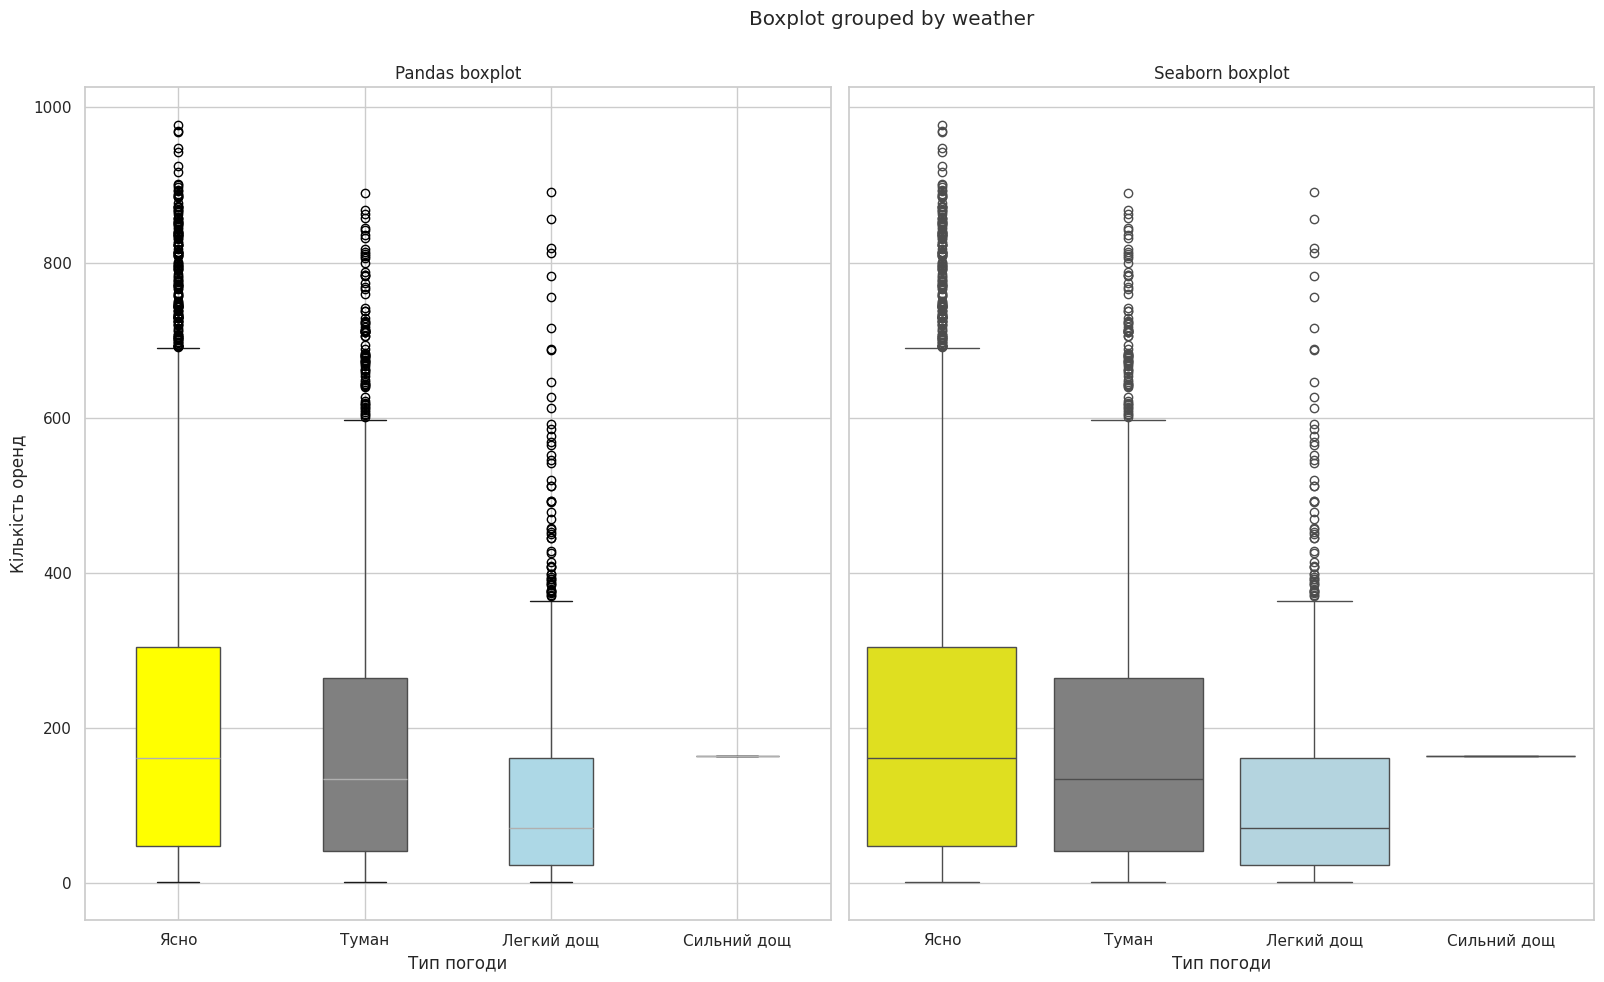

In [ ]:
weather_labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
fig.suptitle('Порівняння розподілу кількості оренд за типом погоди', fontsize=18)

#Pandas boxplot ---
ax = df.boxplot(
    column='count',
    by='weather',
    grid=True,
    patch_artist=True,
    ax=axes[0]
)
colors = ['yellow', 'grey', 'lightblue', 'blue']

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

axes[0].set_title('Pandas boxplot')
axes[0].set_xlabel('Тип погоди')
axes[0].set_ylabel('Кількість оренд')
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(weather_labels)


#Seaborn boxplot ---
palette = {
    1: 'yellow',
    2: 'grey',
    3: 'lightblue',
    4: 'blue'
}

sns.boxplot(
    data=df,
    x='weather',
    y='count',
    hue='weather',
    palette=palette,
    ax=axes[1],
    legend=False
)
axes[1].set_title('Seaborn boxplot')
axes[1].set_xlabel('Тип погоди')
axes[1].set_ylabel('Кількість оренд')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(weather_labels)

# Трохи місця для заголовка
plt.tight_layout(rect=[0, 0, 0.9, 0.98])
plt.show()


#### Яка візуальна різниця між Pandas та Seaborn бокс-плотами?
Візуально мені більш приємний Pandas boxplot - він має яскравіші кольори, чіткі та акуратні коробки. Графік виглядає більш “струнко” і класично.
Проте Seaborn зручніший у написанні коду. Він дозволяє швидко будувати красиві графіки з розфарбуванням (palette), групуванням (hue) і автоматичним стилем. Це значно скорочує час на побудову складних візуалізацій.

В минулому завдання я не побачила великих бефітів від sublots, але зараз, коли стинулася з побудовою саме цієї фігури, зрощуміла, що ліпше через sublots та ах робити. Так буде простіше та адекватніше відображатися графіки.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [ ]:
correlation = df[['count', 'temp', 'season', 'weekday_num', 'windspeed', 'atemp','holiday', 'month' ]].corr()

In [ ]:
correlation

,count,temp,season,weekday_num,windspeed,atemp,holiday,month
count,1.000000,0.394454,0.163439,-0.002283,0.101369,0.389784,-0.005393,0.166862
temp,0.394454,1.000000,0.258689,-0.038466,-0.017852,0.984948,0.000295,0.257589
season,0.163439,0.258689,1.000000,-0.010553,-0.147121,0.264744,0.029368,0.971524
weekday_num,-0.002283,-0.038466,-0.010553,1.000000,-0.024804,-0.040235,-0.191832,-0.002266
windspeed,0.101369,-0.017852,-0.147121,-0.024804,1.000000,-0.057473,0.008409,-0.150192
atemp,0.389784,0.984948,0.264744,-0.040235,-0.057473,1.000000,-0.005215,0.264173
holiday,-0.005393,0.000295,0.029368,-0.191832,0.008409,-0.005215,1.000000,0.001731
month,0.166862,0.257589,0.971524,-0.002266,-0.150192,0.264173,0.001731,1.000000


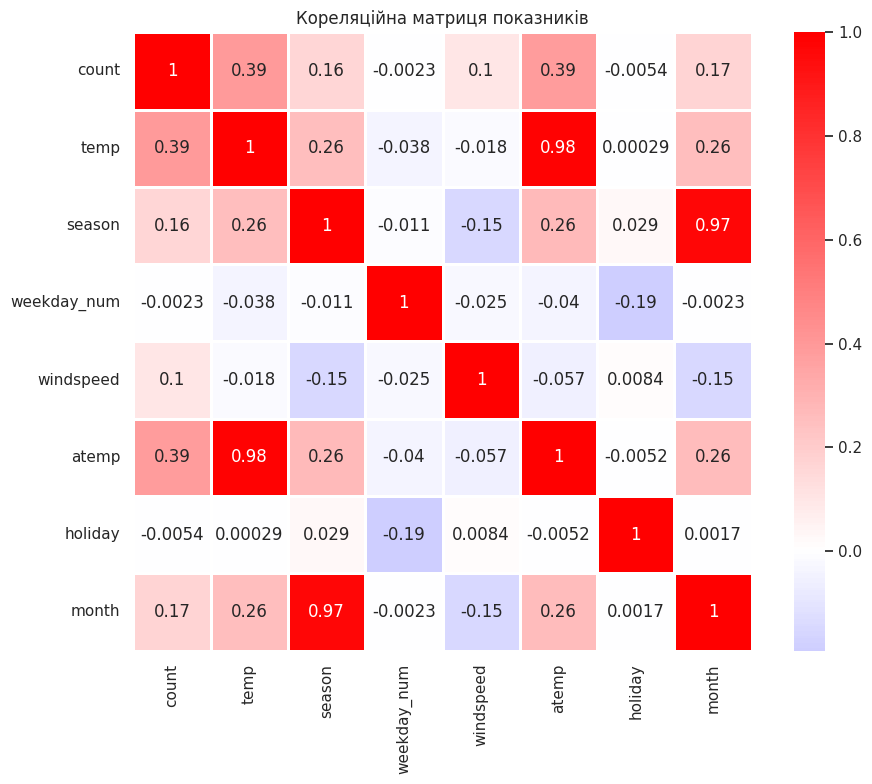

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
#fig.patch.set_facecolor('grey')

sns.heatmap(correlation, annot=True, cmap='bwr', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

In [ ]:
(df['atemp']-df['temp']).mean().round(2)

np.float64(3.42)

1. Найвищу позитивну кореляцію з кількістю оренд мають:
temp (температура) – 0.39
atemp (відчуття температури) – 0.39
Це логічно: з підвищенням температури зростає комфортність пересування велосипедом, що стимулює попит. Водночас, надмірна спека може мати зворотний ефект, тому кореляція не надто висока (менше 0.5).

2. Кореляція між температурою та її відчуттям — 0.98, що дуже високо. Це очікувано, оскільки в більшості випадків "відчуття температури" (apparent temperature) обчислюється на основі реальної температури, вологості та вітру. У наших даних ці два показники відрізняються приблизно на 3-4 градуси.

3. Які змінні мають негативну кореляцію з count?
- holiday: -0.005 — дуже слабка негативна кореляція, майже нульова.
- weekday_num (номер дня тижня): -0.002 — також практично нульова.

Додатково:
- windspeed (швидкість вітру): 0.10 — слабка позитивна, але ближча до нуля.
- season – 0.16, month – 0.17

Висновки:
- основним фактором, який впливає на кількість оренд, є температура.
- інші змінні мають незначний або слабкий вплив.
- висока кореляція між temp і atemp вказує на надлишковість цих двох змінних, їх можна не використовувати одночасно в моделі.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


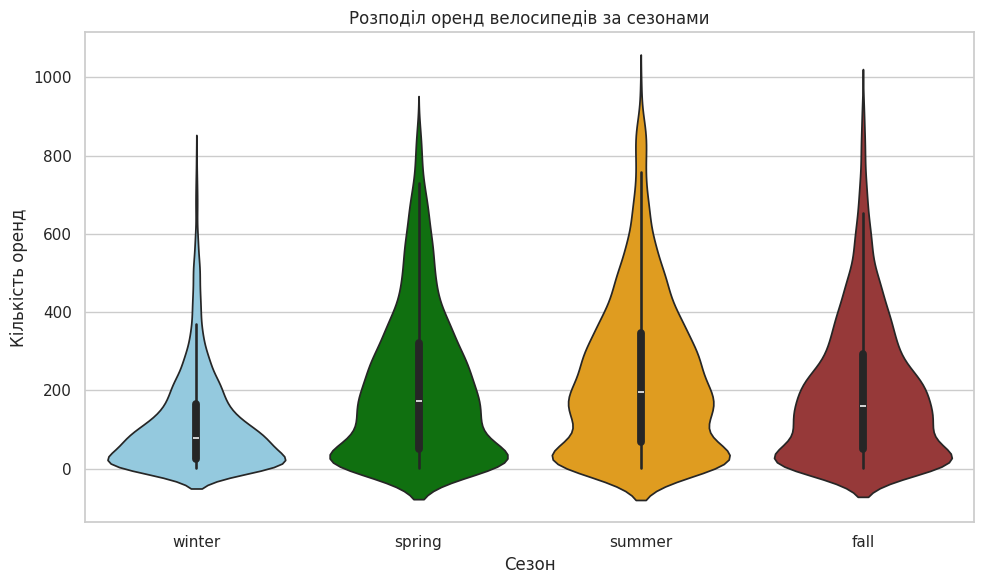

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='season_name',
    y='count',
    hue='season_name',
    palette={'winter': 'skyblue', 'spring': 'green', 'summer': 'orange', 'fall': 'brown'},
    order=['winter', 'spring', 'summer', 'fall'],
    legend=False
)

plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.title('Розподіл оренд велосипедів за сезонами')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1. товщина violin plot відображає густину розподілу даних. Чим ширша ділянка графіка в певному місці, тим більше значень припадає на цей інтервал. Наприклад, якщо найбільше оренд було між 12:00 та 15:00, то саме в цій області графік буде найширшим. Натомість вузькі місця показують, що дані там менш щільні (менше оренд).

2. найбільша варіабельність спостерігається влітку. Це видно по найширшому та найдовшому violin plot - він охоплює великий діапазон значень та має більш виражену «розтягнуту» форму, що свідчить про високий розкид оренд.

3. violin plot дозволяє візуально оцінити, де саме концентрується найбільше значень. Це дає більш чітке розуміння розподілу даних (чи є кілька піків, асиметрія, який розкид даних тощо).

Бачила, що Ганна у відео не рекомендувала фарбувати в різний колір, але на мою думку, коли в нас є сезони (їх всього 4), то візуально більш гармонійно виглядає в кольорах сезону. Або я просто люблю малювати

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

In [ ]:
df.shape

(10886, 19)

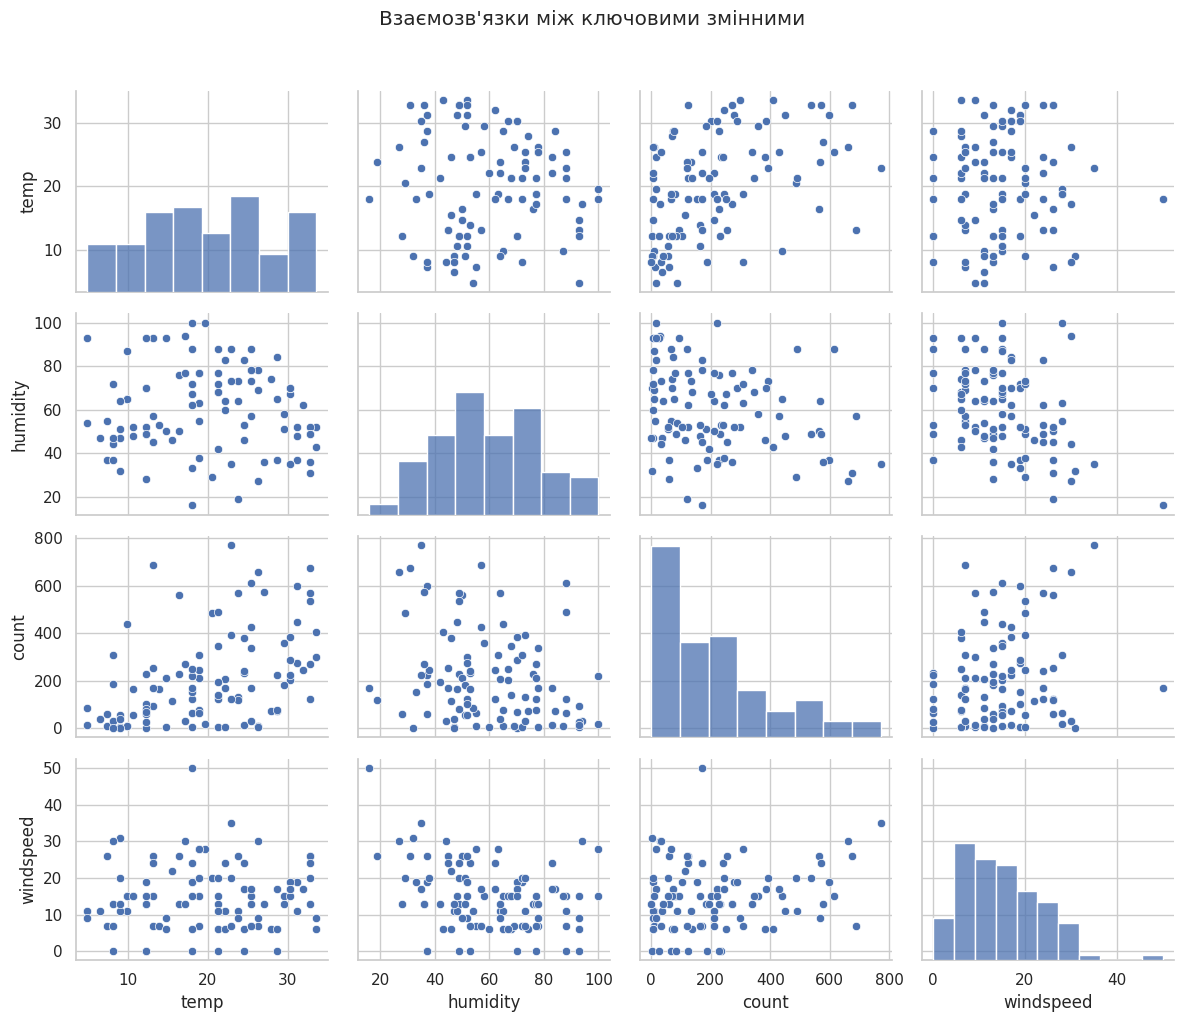

In [ ]:
sample_df = df[['temp', 'humidity', 'count', 'windspeed']].sample(100)

# Побудова першого pairplot
sns.pairplot(sample_df, height=2.5, aspect=1.2)
plt.suptitle("Взаємозв'язки між ключовими змінними", y=1.02)
plt.tight_layout()
plt.show()

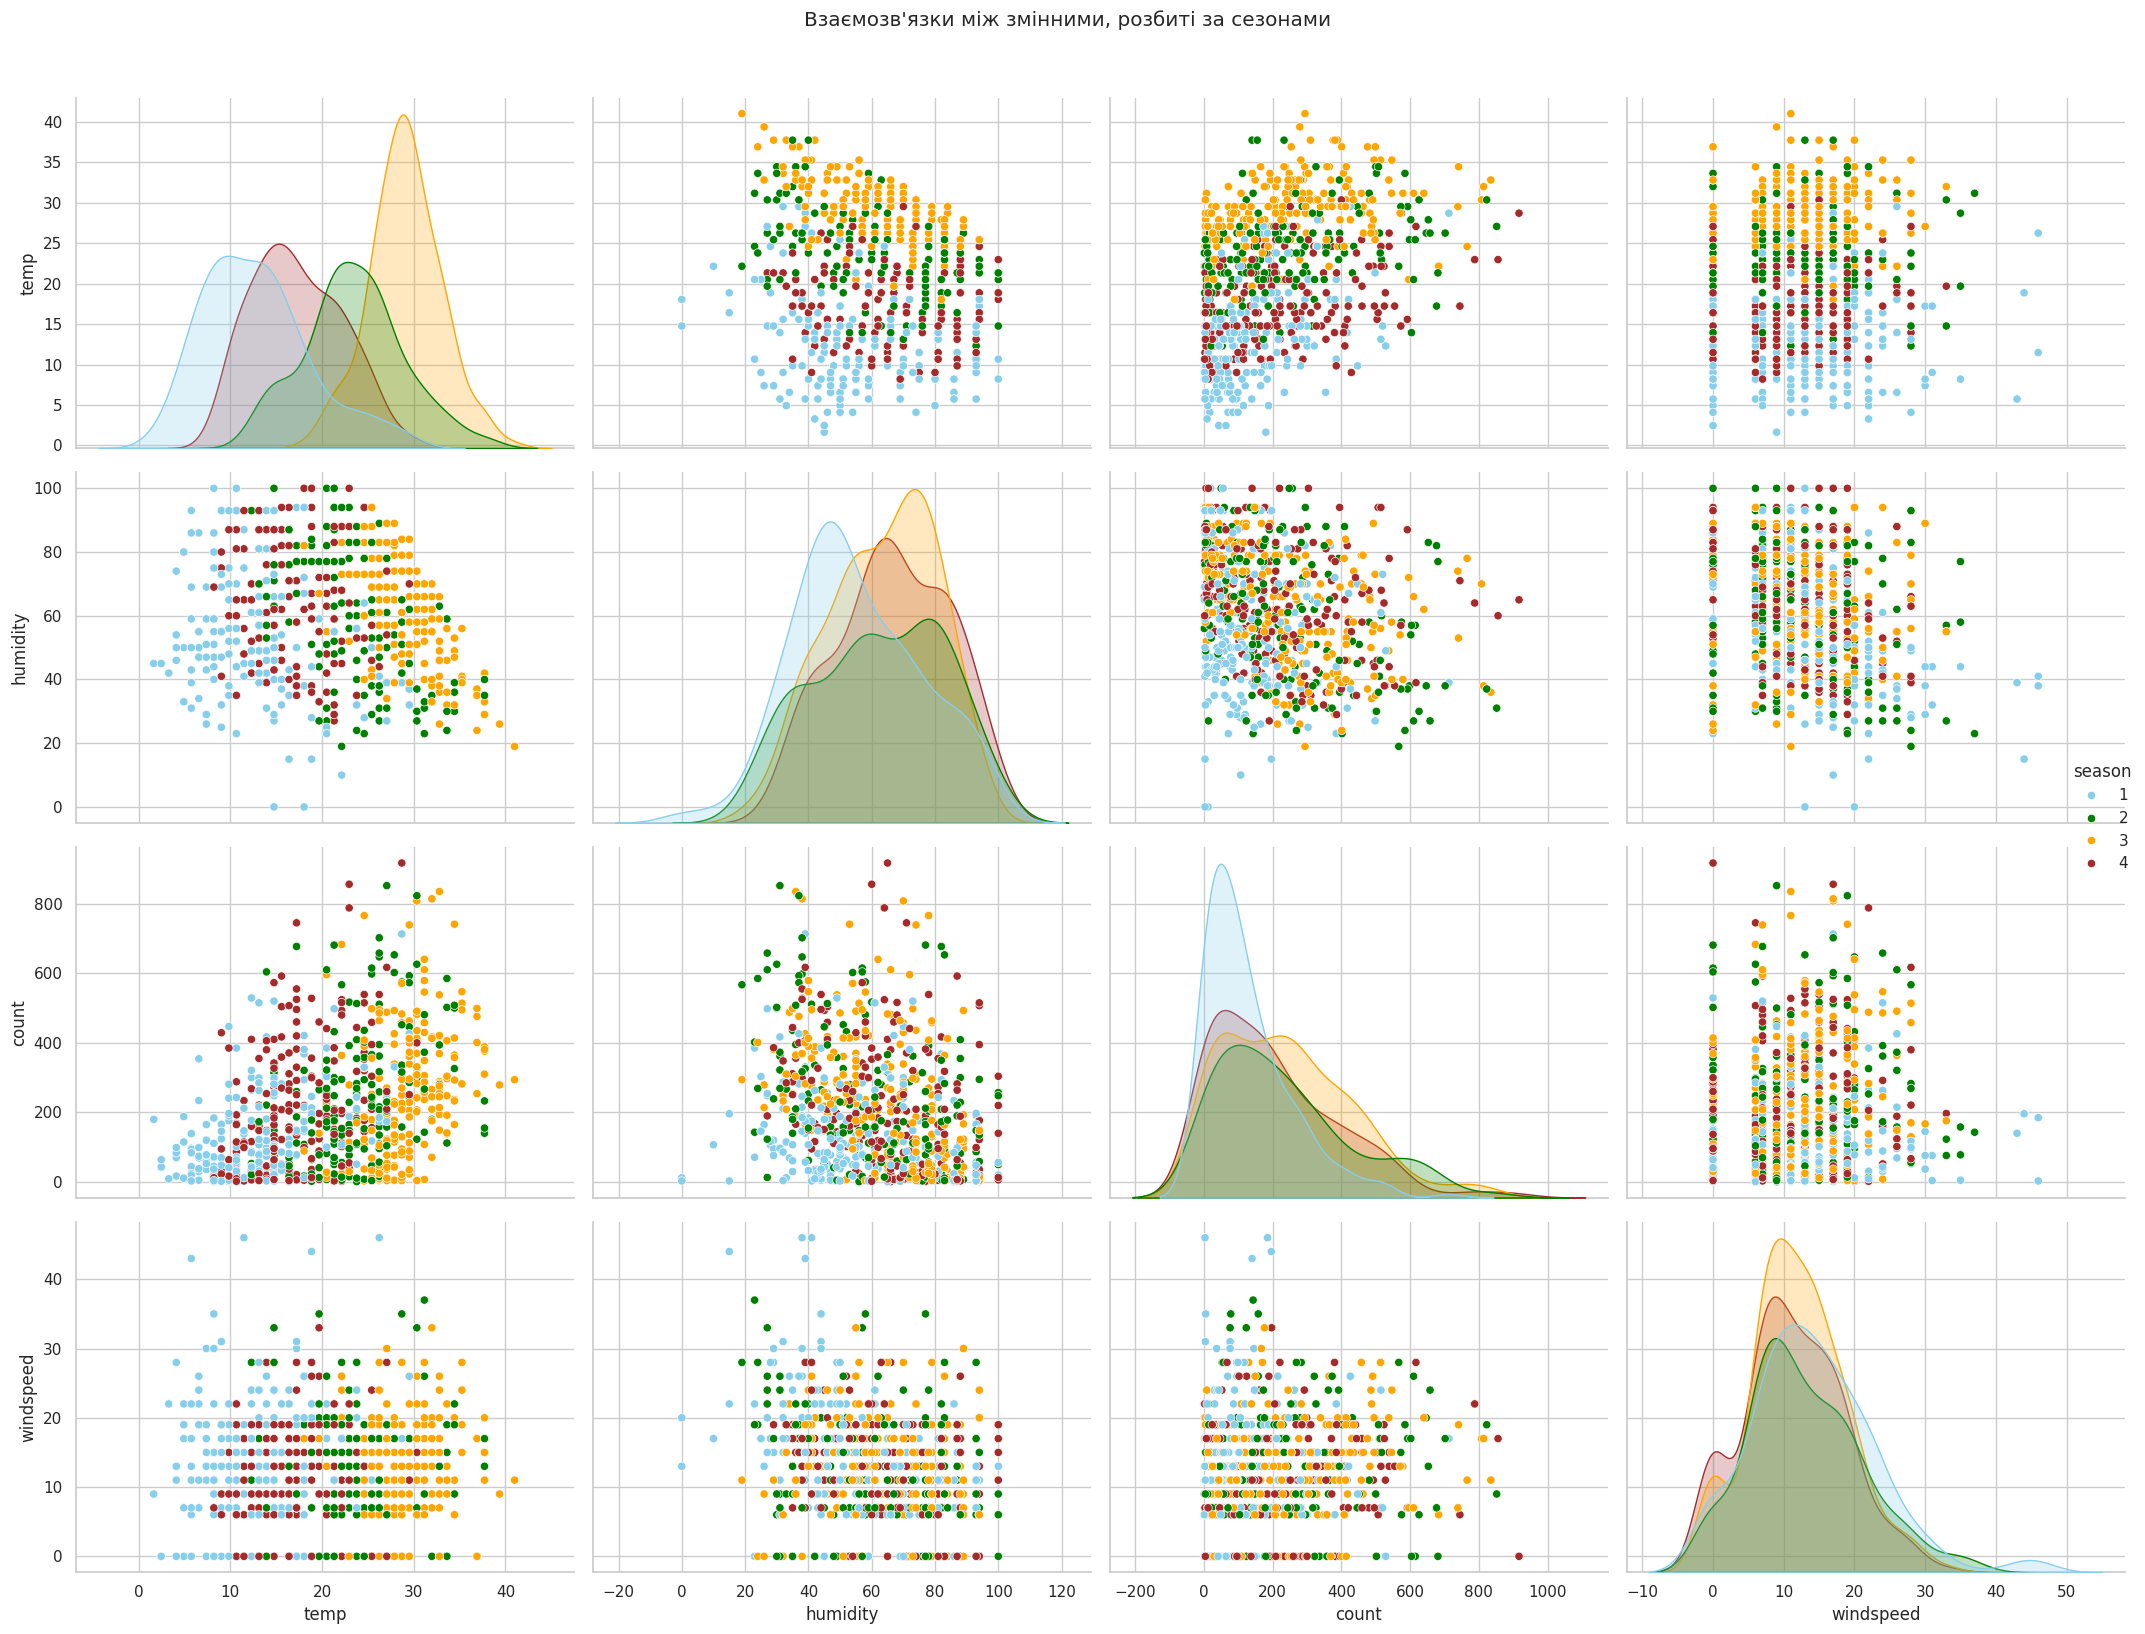

In [ ]:
sample_df = df[['temp', 'humidity', 'count', 'windspeed', 'season']].sample(800, random_state=1)
custom_palette = {
    1: 'skyblue',   # winter
    2: 'green',     # spring
    3: 'orange',    # summer
    4: 'brown'      # fall
}

sns.pairplot(sample_df,  hue='season', palette=custom_palette, height=4.0, aspect=1.3)
plt.suptitle("Взаємозв'язки між змінними, розбиті за сезонами", y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df['temp'].corr(df['humidity'])
print("Коефіцієнт кореляції:", correlation)

Коефіцієнт кореляції: -0.06494877090120942


Найсильніший лінійний зв'язок спостерігається між кількісттю оренд велосипедів та температурою — це логічно, бо температура впливає на комфортність ізди на велосипеді.
Температура найбільше змінюється від сезону, особливо помітно в літній період.
Вологість теж залежить від сезону, але має низьку залежность з температурою.
Швидкість вітру не має суттєвої кореляції з кількістю оренд, вологістю чи температурою. Можливо, у досліджуваній місцевості вітер не є значущим фактором для прийняття рішення щодо використання велосипеда або ж його рівень змінюється незначно протягом року, тобто тримється в комфортних межах.
Хоча вологість не має чіткої лінійної залежності з температурою (на графіках точки розкидані хаотично), спостерігаються цікаві сезонні особливості:
- найвищі значення вологості спостерігаються у літній та зимовий сезони.

Це може бути пов’язано з кліматичними умовами регіону, наприклад, більшою вологістю в зимові місяці через холодне повітря та конденсацію, а також влітку через підвищену випаровуваність і опади. Враховуючи, що  в більшості кліматичних зона найбільш комфортним івнем вологості є 40-60%, то наші дані кількісті оренди велосипедів переважною більшісттю лежать в межах норми.

In [ ]:
# Якщо ще не зроблено:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

# Групуємо
humidity_by_season = df.groupby(['season_name', 'humidity'])['count'].mean().reset_index()

best_humidity = humidity_by_season.loc[humidity_by_season.groupby('season_name')['count'].idxmax()]
print(best_humidity)

    season_name  humidity  count
64        Весна        73  262.0
86         Зима        20  592.0
154        Літо        17  621.5
286       Осінь        75  562.5


## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

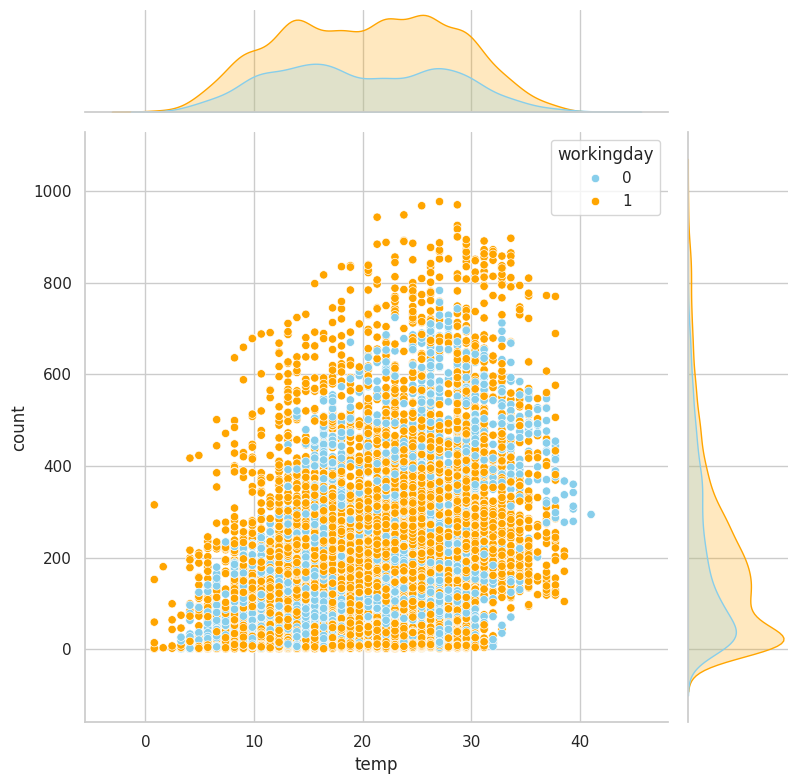

In [ ]:
palette_c={0:'skyblue', 1:'orange'}
sns.jointplot(data=df, x='temp', y='count', palette=palette_c, hue='workingday', height=8);

**Питання для інтерпретації:**
1. Що показують графіки по краях?
- показує розподіли (графіки густини або щільності) значень кожної окремої змінної. Вони показують, як часто зустрічаються певні значення в кожній окремій категорії. У випадку з розбиттям за 'workingday' можна побачити окрему форму розподілу для робочих і вихідних днів,можна порівняти площу під кривими, яка відповідає загальній кількості оренд у кожній групі. Можемо побачити тенденції та масштаби кількості оренд велосипедів окремо у робочі та вихідні дні.

2. Чи є різниця у поведінці користувачів у робочий і неробочий день?
- різниця є. Хоча тенденція розподілу кількості оренди велосипедів загалом схожа між робочими і вихідними днями, кількість оренд у робочі дні помітно вища — приблизно вдвічі.

Це може бути пов’язано з тим, що:
- велосипед використовується як транспорт до роботи, особливо у великих містах, де є транспортні затори в години пік;
- у багатьох країнах активно популяризується екологічність, і велосипед розглядається як екологічна альтернатива автомобілю чи громадському транспорту;
- можливо, у робочі дні оренда більше відбувається вранці та ввечері - в часи добирання до/з роботи.

In [ ]:
w=df[df['workingday'] == 1]['count'].sum()

In [ ]:
ret=df[df['workingday'] == 0]['count'].sum()

np.int64(654872)

In [ ]:
w = df[df['workingday'] == 1]['count'].sum()    # сума поїздок у робочі дні
ret = df[df['workingday'] == 0]['count'].sum()  # сума поїздок у вихідні
print(w)
print(ret)
print(w - ret)

1430604
654872
775732
